In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('marks.txt')
df.head()

,Marks1,Marks2,Y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
def loss(a, y):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

In [5]:
w = np.zeros((2, 1))
w

array([[0.],
       [0.]])

In [6]:
X = np.array(df.iloc[:, :-1])
Y = np.array(df.iloc[:, -1])

In [7]:
def gradient_descent(X, Y, learning_rate):
    # w = np.zeros(X.shape[1])
    w1 = 0
    w2 = 0
    b = 0
    m = X.shape[0]
    costHistory = np.array([])
    for count in range(400):
        # dw = np.zeros_like(w)
        dw1 = 0
        dw2 = 0
        db = 0
        J = 0
        for i in range(m):
            z = w1*X[i][0] + w2*X[i][1] + b
            a = sigmoid(z)
            J = J + loss(a, Y[i])
            dw1 = dw1 + (a - Y[i]) * X[i][0]
            dw2 = dw2 + (a - Y[i]) * X[i][1]
            db = db + (a - Y[i])
            #print('Row ', i)
            #print('dw1, dw2, db = ', dw1, dw2, db)
        J = J/m
        dw1 = dw1/m
        dw2 = dw2/m
        db = db/m
 
        w1 = w1 - learning_rate * dw1
        w2 = w2 - learning_rate * dw2
        b = b - learning_rate * db
        '''print('z = ', z)
        print('J = ', J)
        print('w1 = ', w1)
        print('w2 = ', w2)
        print('b = ', b)
        
        print('------------------------')'''
        costHistory = np.append(costHistory, J)
        
    return w1, w2, b, costHistory

In [8]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [9]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)

In [10]:
w1, w2, b, costHistory = gradient_descent(X, Y, 1)

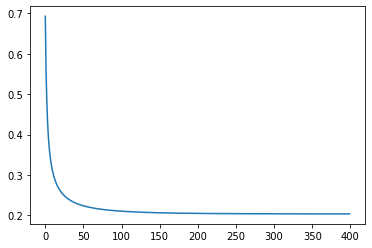

In [11]:
plt.plot(costHistory)

In [12]:
w1, w2, b

(3.867047700302233, 3.603473017873484, 1.6594766420707927)

In [25]:
w = np.array([[3.867047700302233, 3.603473017873484]])
sigmoid(np.dot(w, X[1, :].T) + b)

array([5.80537101e-05])

In [17]:
x_test = np.array([45,85])
x_test = (x_test - X_mean)/X_std
x_test

array([-1.06629865,  1.0155961 ])

In [18]:
sigmoid(np.dot(w, x_test.T) + b)

array([0.76776289])

In [26]:
x_test

array([-1.06629865,  1.0155961 ])

In [27]:
X[0, :]

array([-1.60224763,  0.63834112])

In [34]:
sigmoid(np.dot(w, X.T) + b)

array([[9.65424447e-02, 5.80537101e-05, 4.78728978e-02, 9.88829840e-01,
        9.97787735e-01, 1.23968326e-02, 9.98715756e-01, 4.25553021e-01,
        9.99621552e-01, 7.29172875e-01, 9.03668404e-01, 3.19565876e-02,
        9.99077253e-01, 9.99804743e-01, 1.62189873e-01, 9.78279756e-01,
        4.29550486e-01, 1.55846895e-01, 9.99616662e-01, 5.71860276e-01,
        7.22463695e-02, 9.98303164e-01, 8.63746830e-03, 1.35182949e-04,
        9.90512376e-01, 8.47242607e-01, 5.97265406e-01, 8.58403660e-01,
        9.85046834e-02, 1.89995894e-02, 8.90038539e-01, 9.78525342e-01,
        1.61475413e-01, 3.93898901e-01, 7.93336358e-02, 3.66315854e-02,
        8.43535298e-01, 9.85636456e-01, 2.11196011e-01, 5.37943293e-02,
        9.66887001e-01, 7.17223143e-03, 9.99314342e-01, 5.02505938e-01,
        5.31633647e-03, 1.43834126e-01, 9.91770713e-01, 9.99994288e-01,
        9.98992717e-01, 9.99986554e-01, 9.97679115e-01, 9.99363173e-01,
        8.98782815e-01, 3.36262426e-03, 9.87656302e-03, 5.745022

In [35]:
def predict(X, w, b):
    a = sigmoid(np.dot(w, X.T) + b)
    y_hat = np.zeros((1, a.shape[1]))
    for i in range(a.shape[1]):
        if(a[0][i] >= 0.5):
            y_hat[0][i] = 1
        else:
            y_hat[0][i] = 0
    return y_hat

In [36]:
y_hat = predict(X, w, b)

In [38]:
Y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [39]:
y_hat.astype('int64')

array([[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]])